In [23]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score ,RandomizedSearchCV
%matplotlib inline

In [2]:
df = pd.read_csv('bankloans.csv')

In [3]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
df.info

<bound method DataFrame.info of       age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0      41   3      17       12     176      9.3  11.359392  5.008608      1.0
1      27   1      10        6      31     17.3   1.362202  4.000798      0.0
2      40   1      15       14      55      5.5   0.856075  2.168925      0.0
3      41   1      15       14     120      2.9   2.658720  0.821280      0.0
4      24   2       2        0      28     17.3   1.787436  3.056564      1.0
...   ...  ..     ...      ...     ...      ...        ...       ...      ...
1145   34   1      12       15      32      2.7   0.239328  0.624672      NaN
1146   32   2      12       11     116      5.7   4.026708  2.585292      NaN
1147   48   1      13       11      38     10.8   0.722304  3.381696      NaN
1148   35   2       1       11      24      7.8   0.417456  1.454544      NaN
1149   37   1      20       13      41     12.9   0.899130  4.389870      NaN

[1150 rows x 9 columns]>

In [5]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


<Axes: xlabel='age', ylabel='income'>

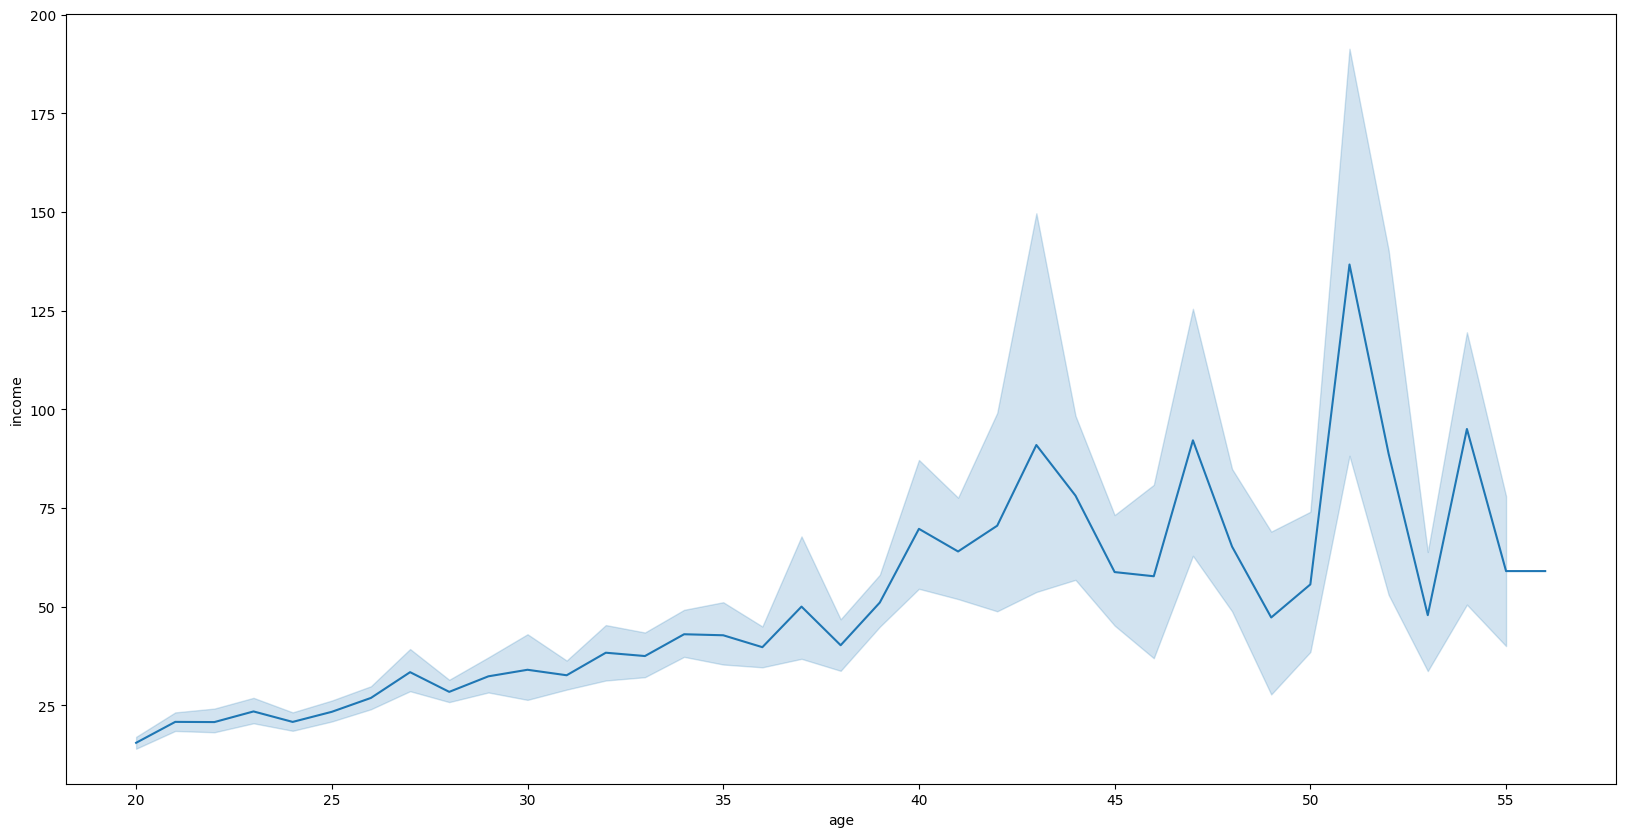

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age', y='income', data=df, ax=ax)

In [9]:
df['default'].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

In [10]:
x = df.drop(['default'], axis=1)
y=df['default']

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [12]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

In [13]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [14]:
x

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,41,3,17,12,176,9.3,11.359392,5.008608
1,27,1,10,6,31,17.3,1.362202,4.000798
2,40,1,15,14,55,5.5,0.856075,2.168925
3,41,1,15,14,120,2.9,2.658720,0.821280
4,24,2,2,0,28,17.3,1.787436,3.056564
...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938
696,29,2,6,4,21,11.5,0.369495,2.045505
697,33,1,15,3,32,7.6,0.491264,1.940736
698,45,1,19,22,77,8.4,2.302608,4.165392


In [20]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [21]:
rfc = RandomForestClassifier(random_state=42)

In [24]:
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_grid,
    n_iter=10,  
    cv=5,      
    random_state=42,
    n_jobs=-1   
)

In [25]:
random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400]},
                   random_state=42)

In [26]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 40}
Best Score: 0.7928571428571429


In [27]:
best_rfc = random_search.best_estimator_
y_pred = best_rfc.predict(xtest)

In [28]:
test_score = best_rfc.score(xtest, ytest)
print("Test Score with Best Parameters:", test_score)

Test Score with Best Parameters: 0.8


In [30]:
sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [31]:
sv.score(xtest,ytest)

0.7928571428571428

In [34]:
model = GridSearchCV(sv,{
    'C':[0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma':[0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel':['rbf','linear']
    
},scoring ='accuracy',cv=10)

In [35]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [36]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [38]:
model2 = SVC(C=0.1,gamma=0.1,kernel='linear')
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.8214285714285714

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [45]:
ypred = model2.predict(xtest)
cmat= confusion_matrix(ytest,ypred)

<Axes: >

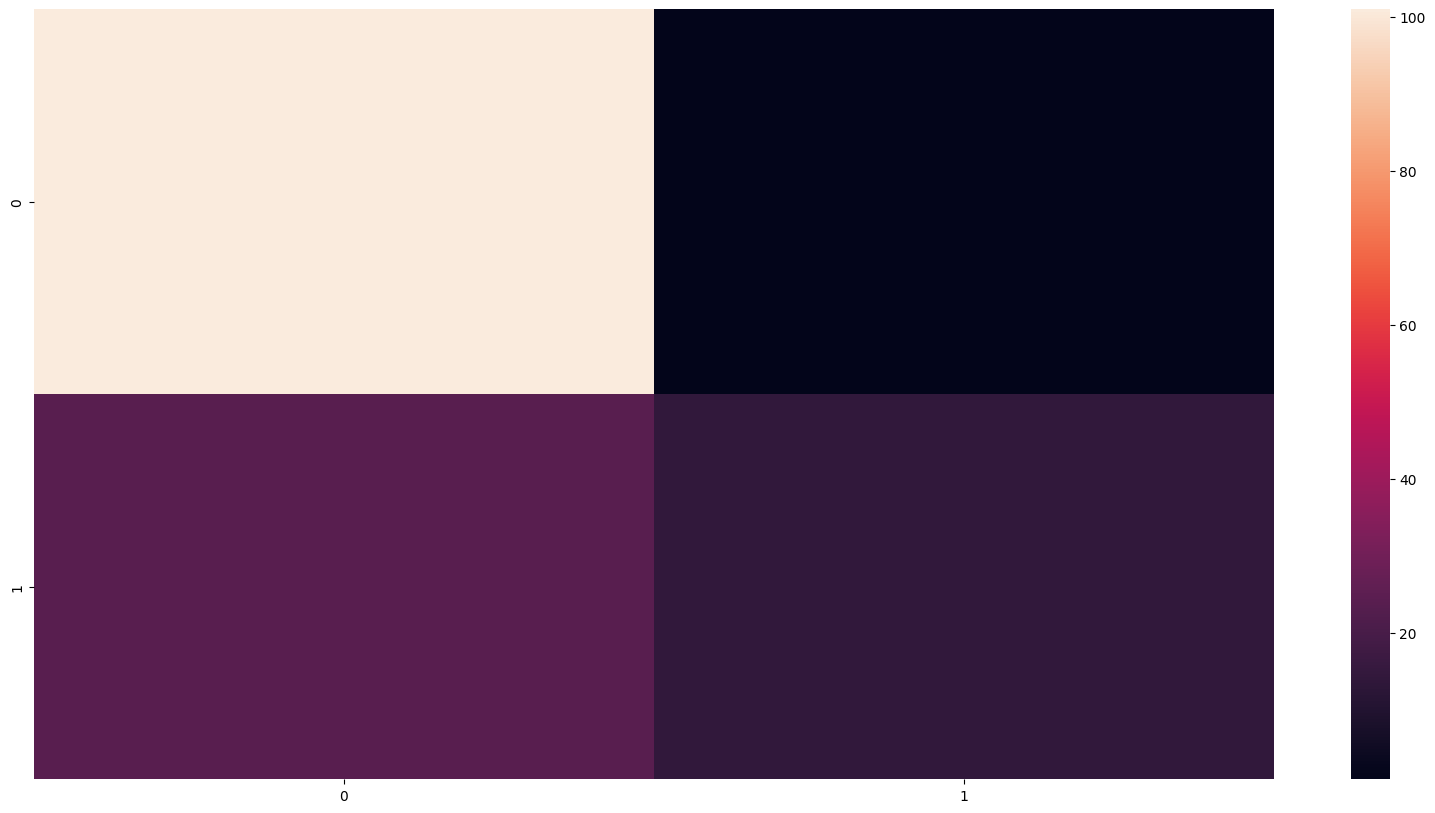

In [49]:
fig,ax =plt.subplots(figsize=(20,10))
sns.heatmap(cmat,ax=ax)